In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


In [45]:
imgL = cv2.imread('MiddEval3-data-Q/MiddEval3/trainingQ/Adirondack/im0.png',cv2.IMREAD_GRAYSCALE)/255
imgR = cv2.imread('MiddEval3-data-Q/MiddEval3/trainingQ/Adirondack/im1.png',cv2.IMREAD_GRAYSCALE)/255

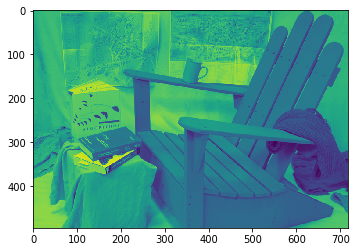

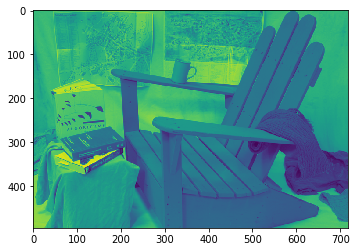

In [48]:
plt.imshow(imgL/255)
plt.show()
plt.imshow(imgR)
plt.show()

In [50]:
window_width = 10
W = window_width // 2

In [58]:
def h(I, x, y, d):
    return I[y, x + d]

In [59]:
def get_grad(x, y, d, I_true, I2):
    return I_true[x, y] - h(I2, x, y, d)

In [60]:
def gradient_descent(error_function, x, y, d, I_true, I2, window, learning_rate=1):
    error = error_function(d, window, y, x, I_true, I2)
    
    grad = get_grad(x, y, d, I_true, I2)
    
    d = d - learning_rate*grad
    
    return error, d

In [90]:
def sum_squared_difference(d, window_width, y, x, I1, I2):
    W = window_width // 2
    sum = 0
    for i in range(-W, W+1):
        for j in range(-W, W+1):
            sum += np.square(I1[y + j, x + i] - h(I2, x+i, y+j, d))
    return sum

In [91]:
def sum_absoulte_difference(d, window_width, y, x, I1, I2):
    W = window_width // 2
    sum = 0
    for i in range(-W, W+1):
        for j in range(-W, W+1):
            sum += np.abs(I1[y + j, x + i] - I2[y + j, x + i + d])
    return sum

In [95]:
def getAverage(img, u, v, n):
    """img as a square matrix of numbers"""
    s = 0
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            s += img[u+i][v+j]
    return float(s)/(2*n+1)**2

def getStandardDeviation(img, u, v, n):
    s = 0
    avg = getAverage(img, u, v, n)
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            s += (img[u+i][v+j] - avg)**2
    return (s**0.5)/(2*n+1)

# def zero_normalize_cross_correlation(img1, img2, u1, v1, u2, v2, n):
def zero_normalize_cross_correlation(d, window_width, y, x, I1, I2):
    W = window_width // 2
    
    stdDeviation1 = getStandardDeviation(img1, y, x, W)
    stdDeviation2 = getStandardDeviation(img2, y, x+d, W)
    avg1 = getAverage(img1, y, x, W)
    avg2 = getAverage(img2, y, x+d, W)

    s = 0
    for i in range(-W, W+1):
        for j in range(-W, W+1):
            s += (img1[y+i][x+j] - avg1)*(img2[y+i][x+j+d] - avg2)
    return float(s)/((2*W+1)**2 * stdDeviation1 * stdDeviation2)

In [92]:
def compute_d(error_function, imgL, imgR, x, y, window_width):
    min_d = 0
    min_err = error_function(min_d, window_width, y, x, imgL, imgR)
    for i in range(0 + window_width, imgR.shape[1] - window_width):
        e = error_function(x - i, window_width, y, x, imgL, imgR)
        if e < min_err: 
            min_err = e
            min_d = x - i
    return min_d, min_err

In [93]:
compute_d(sum_squared_difference, imgL, imgR, 50, 50, window_width)

(-15, 0.051410995770857545)

In [94]:
compute_d(sum_absoulte_difference, imgL, imgR, 50, 50, window_width)

(-15, 2.4588235294117613)

In [96]:
compute_d(zero_normalize_cross_correlation, imgL, imgR, 50, 50, window_width)

NameError: name 'img1' is not defined

In [30]:
sum_squared_difference(-30, 10, 50, 50, imgL, imgR)

16913

In [52]:
vals = [sum_squared_difference(i, 10, 50, 50, imgL, imgR) for i in range(-200, 200)]